# **Phishing URL Detection**

**Objective:**

Build a model that predicts/classifies whether a website is a Phishing website.


## **Importing Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from numpy import mean,absolute
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

**Importing the dataset**

In [2]:
df = pd.read_csv("Phishing_Data.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


## **Exploratory data analysis(EDA)**

In [3]:
# whether any missing values or null values in dataset
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

There are no missing or null values in given dataset

In [4]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [5]:
# information about no of rows and columns
print("No. of rows in dataset: ",df.shape[0])
print("No. of columns in dataset: ",df.shape[1])

No. of rows in dataset:  2456
No. of columns in dataset:  31


In [6]:
# no of unique values in each column
df.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  3
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    3
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            2
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  3
DNSRecord                      2
web_traffic                    3
Page_Rank                      3
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [7]:
# statistical information about data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,2456.0,0.113192,0.316892,0.0,0.0,0.0,0.0,1.0
URL_Length,2456.0,-0.649837,0.752690,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,2456.0,0.122964,0.328463,0.0,0.0,0.0,0.0,1.0
having_At_Symbol,2456.0,0.054560,0.227166,0.0,0.0,0.0,0.0,1.0
double_slash_redirecting,2456.0,0.125407,0.331247,0.0,0.0,0.0,0.0,1.0
Prefix_Suffix,2456.0,-0.254886,0.676170,-1.0,-1.0,0.0,0.0,1.0
having_Sub_Domain,2456.0,-0.185668,0.802068,-1.0,-1.0,0.0,0.0,1.0
SSLfinal_State,2456.0,0.255700,0.912332,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,2456.0,0.018730,0.798455,-1.0,-1.0,0.0,1.0,1.0
Favicon,2456.0,0.189739,0.392175,0.0,0.0,0.0,0.0,1.0


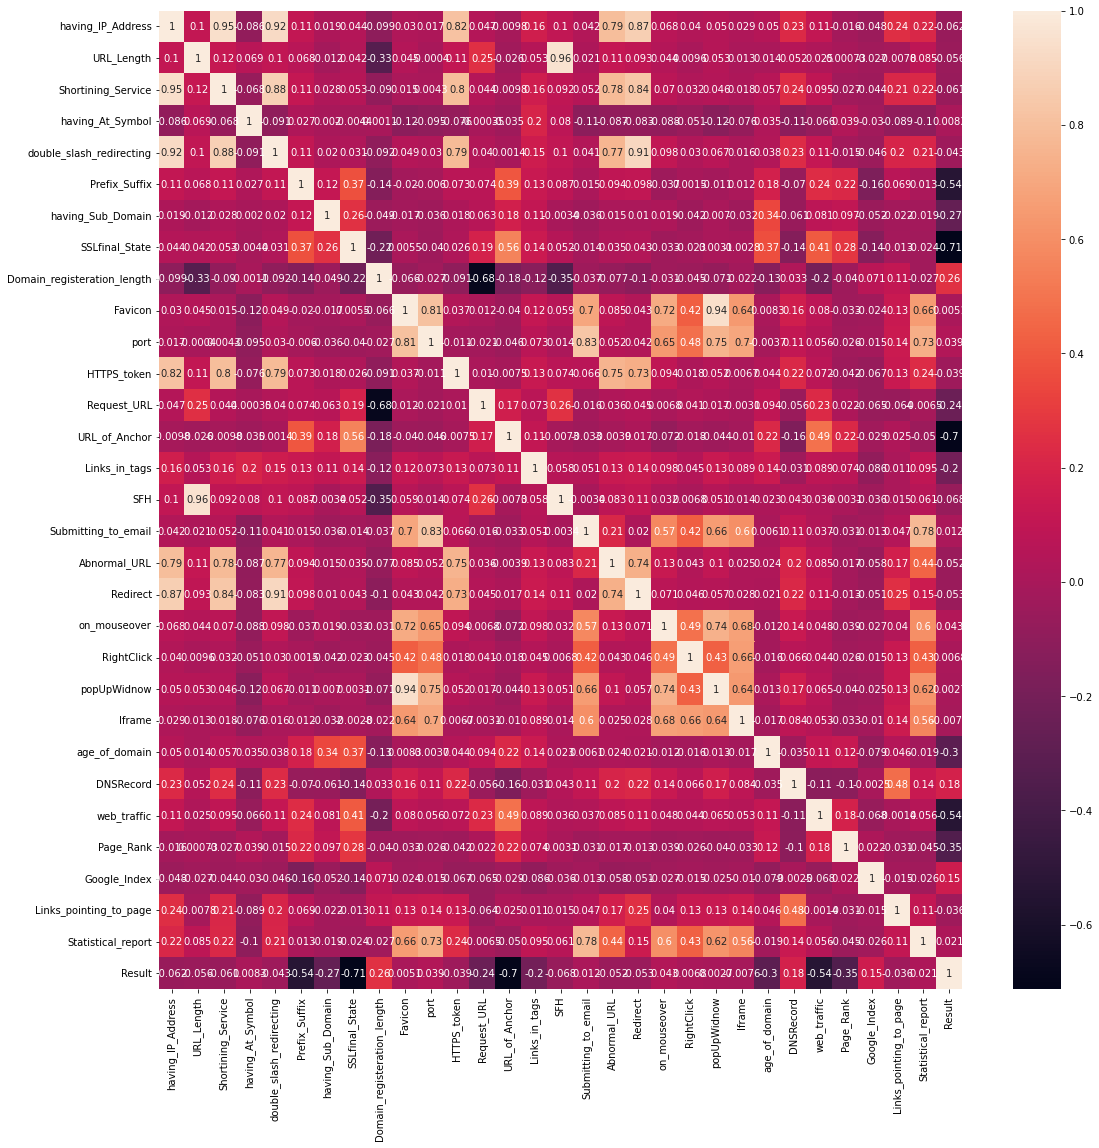

In [8]:
# finding correlation between features
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

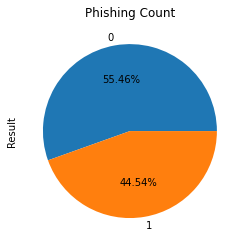

In [9]:
# Phishing Count using pie chart
df['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## **Splitting of dataset**

Here data is split into 80% training and 20% test

In [10]:
# X is independent variable and Y is dependent variable
# here all variables are independent except the result feature

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [11]:
# creating training and test sets in 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =1)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1964, 30), (1964,), (492, 30), (492,))

## **Building and Training the model**

Here we will use Supervised Machine Learning algorithms as we have labelled dataset.
Moreover, this is a classification problem as our target data is discrete.
The algorithms we will use under supervised ML and classification are:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Xgboost

The metrics used for evaluating the model performance are confusion matrix,accuracy, f1 score,recall,precision

In [12]:
# Holders for storing the model performance results
ML_Model = []
accuracy = []
f1score = []
recall = []
precision = []

#function for storing the results
def storedResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

**1.Logistic Regression**

In [13]:
# build the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,Y_train)

LogisticRegression()

In [16]:
# cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(log, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("KFold Cross Validation Score: ",mean(absolute(scores)))

KFold Cross Validation Score:  0.06188548341695229


In [18]:
# prediction on test data
logpredict = log.predict(X_test)

In [19]:
# confusion matrix used to observe performance of the model
confusionmatrix = confusion_matrix(Y_test,logpredict)
print(confusionmatrix)

[[256  16]
 [ 19 201]]


From above observation,we can say 256+201=457 values are correctly predicted and 19+16 are incorrectly predicted.

In [20]:
# performance measures
classreport= classification_report(Y_test,logpredict)
print(classreport)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       272
           1       0.93      0.91      0.92       220

    accuracy                           0.93       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.93      0.93      0.93       492



In [21]:
#storing the results
acc_log = accuracy_score(Y_test, logpredict)
f1_score_log = f1_score(Y_test, logpredict)
recall_log = recall_score(Y_test, logpredict)
precision_log = accuracy_score(Y_test, logpredict)

storedResults('Logistic Regression',acc_log,f1_score_log,
             recall_log,precision_log)

**2. Decision Tree**

In [22]:
# build the model
modeltree = DecisionTreeClassifier()

# fit the model 
modeltree.fit(X_train, Y_train)

#prediction on unseen data
y_pred_tree = modeltree.predict(X_test)

In [23]:
# cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(modeltree, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("KFold Cross Validation Score: ",mean(absolute(scores)))

KFold Cross Validation Score:  0.03338466378553805


In [24]:
# performance measure
confusionmatrix_tree = confusion_matrix(Y_test,y_pred_tree)
print(confusionmatrix_tree)

[[262  10]
 [ 11 209]]


In [25]:
# performance measures
classreport_tree= classification_report(Y_test,y_pred_tree)
print(classreport_tree)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       272
           1       0.95      0.95      0.95       220

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492



In [26]:
# storing the results
acc_tree = accuracy_score(Y_test, y_pred_tree)
f1_score_tree = f1_score(Y_test, y_pred_tree)
recall_tree = recall_score(Y_test, y_pred_tree)
precision_tree = accuracy_score(Y_test, y_pred_tree)

storedResults('Decision Tree',acc_tree,f1_score_tree,
             recall_tree,precision_tree)

**3. Random Forest**

In [27]:
# build the model
forest = RandomForestClassifier(n_estimators=100)

# fit the model 
forest.fit(X_train,Y_train)

#prediction
y_pred_forest = forest.predict(X_test)

In [28]:
# cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(forest, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("KFold Cross Validation Score: ",mean(absolute(scores)))

KFold Cross Validation Score:  0.025648667891974238


In [29]:
# performance measures
confusionmatrix_forest = confusion_matrix(Y_test,y_pred_forest)
print(confusionmatrix_forest)

[[262  10]
 [  6 214]]


In [30]:
classreport_forest= classification_report(Y_test,y_pred_forest)
print(classreport_forest)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       272
           1       0.96      0.97      0.96       220

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492



In [31]:
# storing results
acc_forest = accuracy_score(Y_test, y_pred_forest)
f1_score_forest = f1_score(Y_test, y_pred_forest)
recall_forest = recall_score(Y_test, y_pred_forest)
precision_forest = accuracy_score(Y_test, y_pred_forest)

storedResults('Random Forest',acc_forest,f1_score_forest,
             recall_forest,precision_forest)

**4. Gradient Boosting**

In [32]:
# build the model
gbc = GradientBoostingClassifier(learning_rate=0.3)

# fit the model 
gbc.fit(X_train,Y_train)

#prediction
y_pred_gbc = gbc.predict(X_test)

In [33]:
# cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(gbc, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("KFold Cross Validation Score: ",mean(absolute(scores)))

KFold Cross Validation Score:  0.03215852830626066


In [34]:
# performance measures
confusionmatrix_gbc = confusion_matrix(Y_test,y_pred_gbc)
print(confusionmatrix_gbc)

[[255  17]
 [  8 212]]


In [35]:
classreport_gbc= classification_report(Y_test,y_pred_gbc)
print(classreport_gbc)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       272
           1       0.93      0.96      0.94       220

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492



In [36]:
# storing results
acc_gbc = accuracy_score(Y_test, y_pred_gbc)
f1_score_gbc = f1_score(Y_test, y_pred_gbc)
recall_gbc = recall_score(Y_test, y_pred_gbc)
precision_gbc = accuracy_score(Y_test, y_pred_gbc)

storedResults('Gradient Boosting',acc_gbc,f1_score_gbc,
             recall_gbc,precision_gbc)

**5. XGBoost**

In [37]:
# build the model
xgb = XGBClassifier(learning_rate = 0.5,max_depth =5)

# fit the model 
xgb.fit(X_train,Y_train)

XGBClassifier(learning_rate=0.5, max_depth=5)

In [38]:
# cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(xgb, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("KFold Cross Validation Score: ",mean(absolute(scores)))

KFold Cross Validation Score:  0.028498335899855943


In [39]:
# prediction
y_pred_xgb = xgb.predict(X_test)

In [40]:
# performance measures
confusionmatrix_xgb = confusion_matrix(Y_test,y_pred_xgb)
print(confusionmatrix_xgb)

[[261  11]
 [  7 213]]


In [41]:
classreport_xgb= classification_report(Y_test,y_pred_xgb)
print(classreport_xgb)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       272
           1       0.95      0.97      0.96       220

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492



In [42]:
# storing results
acc_xgb = accuracy_score(Y_test, y_pred_xgb)
f1_score_xgb = f1_score(Y_test, y_pred_xgb)
recall_xgb = recall_score(Y_test, y_pred_xgb)
precision_xgb = accuracy_score(Y_test, y_pred_xgb)

storedResults('XGBoost',acc_xgb,f1_score_xgb,
             recall_xgb,precision_xgb)

## **Comparison of all models**

In [43]:
# creating dataframe for observing the comparision of all models
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [44]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.929,0.920,0.914,0.929
1,Decision Tree,0.957,0.952,0.950,0.957
2,Random Forest,0.967,0.964,0.973,0.967
3,Gradient Boosting,0.949,0.944,0.964,0.949
4,XGBoost,0.963,0.959,0.968,0.963


In [45]:
# sorting result according to accuracy and f1_score
sorted_result=result.sort_values(by=['Accuracy','f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.967,0.964,0.973,0.967
1,XGBoost,0.963,0.959,0.968,0.963
2,Decision Tree,0.957,0.952,0.950,0.957
3,Gradient Boosting,0.949,0.944,0.964,0.949
4,Logistic Regression,0.929,0.920,0.914,0.929


**Observing the feature importance in top model(Random Forest)**

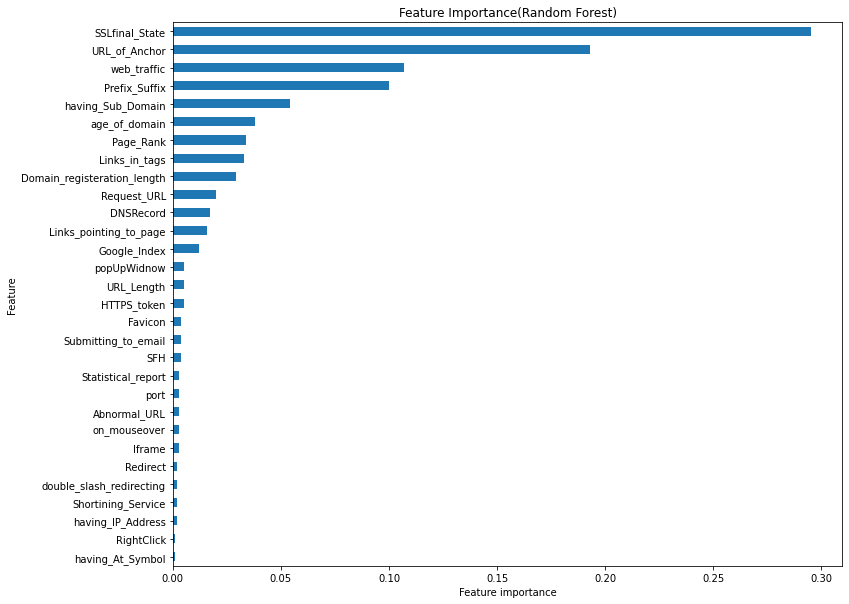

In [46]:
importance = pd.DataFrame({'feature': X_train.columns,
                            'importance' : np.round(forest.feature_importances_, 3)})
importance.sort_values('importance', ascending=True, inplace = True)

importance.plot(x='feature',kind='barh',title='Feature Importance(Random Forest)',legend= False,figsize=(12,10))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()